## Random Acts of Pizza

### ====================================================================================================

In [1]:
%cd \Users\user\Downloads\

/Users/user/Downloads


In [2]:
import pandas as pd
from sklearn import linear_model,tree, ensemble,decomposition,datasets,preprocessing, grid_search
from sklearn.metrics import roc_curve, auc
import numpy as np
import pylab as pl
import datetime
import re
from nltk.tag import pos_tag
from sklearn.decomposition import ProjectedGradientNMF
import sklearn.feature_extraction.text as text
%matplotlib inline

In [3]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [4]:
#Random sampling
num_obs = len(train)
num_train_sample = int((num_obs) * 0.70)

from random import sample

#create random index
rindex = np.array(sample(xrange(len(trai n)),num_train_sample))

#get "num_train_sample" random rows from train

train_df = train.ix[rindex]

train_df_cv = train.drop(rindex)

In [5]:
print "number of obs for training:",len(train_df)
print "number of obs for cross validation:",len(train_df_cv)
print "number of obs for test dataset:",len(test)

number of obs for training: 2828
number of obs for cross validation: 1212
number of obs for test dataset: 1631


In [6]:
#Available columns in training dataset
list(train.columns)

[u'giver_username_if_known',
 u'number_of_downvotes_of_request_at_retrieval',
 u'number_of_upvotes_of_request_at_retrieval',
 u'post_was_edited',
 u'request_id',
 u'request_number_of_comments_at_retrieval',
 u'request_text',
 u'request_text_edit_aware',
 u'request_title',
 u'requester_account_age_in_days_at_request',
 u'requester_account_age_in_days_at_retrieval',
 u'requester_days_since_first_post_on_raop_at_request',
 u'requester_days_since_first_post_on_raop_at_retrieval',
 u'requester_number_of_comments_at_request',
 u'requester_number_of_comments_at_retrieval',
 u'requester_number_of_comments_in_raop_at_request',
 u'requester_number_of_comments_in_raop_at_retrieval',
 u'requester_number_of_posts_at_request',
 u'requester_number_of_posts_at_retrieval',
 u'requester_number_of_posts_on_raop_at_request',
 u'requester_number_of_posts_on_raop_at_retrieval',
 u'requester_number_of_subreddits_at_request',
 u'requester_received_pizza',
 u'requester_subreddits_at_request',
 u'requester_upvo

In [7]:
#Available columns in test dataset
list(test.columns)

[u'giver_username_if_known',
 u'request_id',
 u'request_text_edit_aware',
 u'request_title',
 u'requester_account_age_in_days_at_request',
 u'requester_days_since_first_post_on_raop_at_request',
 u'requester_number_of_comments_at_request',
 u'requester_number_of_comments_in_raop_at_request',
 u'requester_number_of_posts_at_request',
 u'requester_number_of_posts_on_raop_at_request',
 u'requester_number_of_subreddits_at_request',
 u'requester_subreddits_at_request',
 u'requester_upvotes_minus_downvotes_at_request',
 u'requester_upvotes_plus_downvotes_at_request',
 u'requester_username',
 u'unix_timestamp_of_request',
 u'unix_timestamp_of_request_utc']

In [8]:
print 'Number of variables in training dataset',len(train_df.columns)
print 'Number of variables in test dataset',len(test.columns)

Number of variables in training dataset 32
Number of variables in test dataset 17


## Training Dataset

In [9]:
train_df.head(2)

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
1959,N/A,0,3,0,t3_meys2,1,"Hey, RAOP! I'm having a rather crappy day. Las...","Hey, RAOP! I'm having a rather crappy day. Las...","[REQ] I got my car towed today, Pizza would ma...",0.000000,...,False,[Random_Acts_Of_Pizza],3,3,3,3,None,jhansipower,1321484822,1321484822
1891,N/A,0,1,0,t3_yfn0b,0,Just started working yesterday and I'm tireeee...,Just started working yesterday and I'm tireeee...,"[Request] Hangin with my friend tonight, would...",52.623009,...,False,"[BigBrother, CircLoLjerk, Fitness, GlobalOffen...",1100,3927,1742,6265,None,Tankercow,1345313297,1345309697


In [10]:
#Select only columns that are both present in the test data and training data 
train_df = train_df[[ u'requester_received_pizza',
 u'giver_username_if_known',
 u'request_id',
 u'request_text_edit_aware',
 u'request_title',
 u'requester_account_age_in_days_at_request',
 u'requester_days_since_first_post_on_raop_at_request',
 u'requester_number_of_comments_at_request',
 u'requester_number_of_comments_in_raop_at_request',
 u'requester_number_of_posts_at_request',
 u'requester_number_of_posts_on_raop_at_request',
 u'requester_number_of_subreddits_at_request',
 u'requester_subreddits_at_request',
 u'requester_upvotes_minus_downvotes_at_request',
 u'requester_upvotes_plus_downvotes_at_request',
 u'requester_username',
 u'unix_timestamp_of_request',
 u'unix_timestamp_of_request_utc']]

In [11]:
train_df.head(2)

,requester_received_pizza,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
1959,False,N/A,t3_meys2,"Hey, RAOP! I'm having a rather crappy day. Las...","[REQ] I got my car towed today, Pizza would ma...",0.000000,0.000000,0,0,0,0,1,[Random_Acts_Of_Pizza],3,3,jhansipower,1321484822,1321484822
1891,False,N/A,t3_yfn0b,Just started working yesterday and I'm tireeee...,"[Request] Hangin with my friend tonight, would...",52.623009,17.892986,179,2,13,0,26,"[BigBrother, CircLoLjerk, Fitness, GlobalOffen...",1100,1742,Tankercow,1345313297,1345309697


In [12]:
re_pattern_img = r'\b(?:img|jpg|gif|png)\b'
re_pattern_reciprocity = r'\b(?:pay it forward|pay it back|return the favor)\b'
re_pattern_subreddit = r'\b(?:Random_Acts_Of_Pizza|AskReddit)\b'

In [13]:
#Create new features
train_df['received'] = train_df.requester_received_pizza.map(lambda x: 0 if x == False else 1)
train_df['giver_username_if_known_011'] = train_df.giver_username_if_known.map(lambda x: 0 if x == "N/A" else 1)
train_df['request_text_edit_aware_len'] = train_df.request_text_edit_aware.map(lambda x: len(x))
train_df['request_title_len'] = train_df.request_title.map(lambda x: len(x))

In [14]:
train_df['unix_timestamp_of_request_utc_year'] = train_df.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).year)
train_df['unix_timestamp_of_request_utc_month'] = train_df.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).month)
train_df['unix_timestamp_of_request_utc_day'] = train_df.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).day)
train_df['unix_timestamp_of_request_utc_hour'] = train_df.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).hour)
train_df['unix_timestamp_of_request_utc_wkday'] = train_df.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).weekday())

In [15]:
train_df['request_text_edit_aware_img'] = train_df.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_img, x)) <> 0 else 0 )
train_df['request_text_edit_aware_reciprocity'] = train_df.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_reciprocity, x)) <> 0 else 0 )
train_df['subreddit_groups'] = train_df.requester_subreddits_at_request.map(lambda x: 1 if len(re.findall(re_pattern_subreddit, str(x))) <> 0 else 0 )

In [16]:
print 'Received : True    = ' , len(train_df.loc[train_df['received'] == 1])
print 'Received : False   = ' , len(train_df.loc[train_df['received'] == 0])
print 'Percentage of True = ' , np.round((float(len(train_df.loc[train_df['received'] == 1]))/ (len(train_df.loc[train_df['received'] == 1]) + len(train_df.loc[train_df['received'] == 0]))) * 100,2),'%'

Received : True    =  711
Received : False   =  2117
Percentage of True =  25.14 %


In [17]:
#List columns that will be included in the model
train_cols = ['requester_account_age_in_days_at_request',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_on_raop_at_request',
 'requester_number_of_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
 'requester_upvotes_plus_downvotes_at_request',
 'giver_username_if_known_011',
 'request_text_edit_aware_len',
 'request_title_len',
 'unix_timestamp_of_request_utc_year',
 'unix_timestamp_of_request_utc_month',
 'unix_timestamp_of_request_utc_day',
 'unix_timestamp_of_request_utc_hour',
 'unix_timestamp_of_request_utc_year',
 'unix_timestamp_of_request_utc_wkday'
 ]

#### Fit Model

In [18]:
X_train = train_df[train_cols].values
Y_train = train_df['received'].values

In [19]:
Extratrees = ensemble.GradientBoostingRegressor()
Extratrees.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

## CROSS VALIDATION DATASET

In [20]:
#Create new features
train_df_cv['received'] = train_df_cv.requester_received_pizza.map(lambda x: 0 if x == False else 1)
train_df_cv['giver_username_if_known_011'] = train_df_cv.giver_username_if_known.map(lambda x: 0 if x == "N/A" else 1)
train_df_cv['request_text_edit_aware_len'] = train_df_cv.request_text_edit_aware.map(lambda x: len(x))
train_df_cv['request_title_len'] = train_df_cv.request_title.map(lambda x: len(x))

In [21]:
train_df_cv['unix_timestamp_of_request_utc_year'] = train_df_cv.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).year)
train_df_cv['unix_timestamp_of_request_utc_month'] = train_df_cv.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).month)
train_df_cv['unix_timestamp_of_request_utc_day'] = train_df_cv.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).day)
train_df_cv['unix_timestamp_of_request_utc_hour'] = train_df_cv.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).hour)
train_df_cv['unix_timestamp_of_request_utc_wkday'] = train_df_cv.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).weekday())

In [22]:
train_df_cv['request_text_edit_aware_img'] = train_df_cv.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_img, x)) <> 0 else 0 )
train_df_cv['request_text_edit_aware_reciprocity'] = train_df_cv.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_reciprocity, x)) <> 0 else 0 )
train_df_cv['subreddit_groups'] = train_df_cv.requester_subreddits_at_request.map(lambda x: 1 if len(re.findall(re_pattern_subreddit, str(x))) <> 0 else 0 )

In [23]:
X_cv = train_df_cv[train_cols].values

#### Predict Cross Validation

In [24]:
Output_cv  = Extratrees.predict(X_cv)

In [25]:
Table = pd.DataFrame(Output_cv,columns=["Predicted"])
Table["Actual"] = train_df_cv['received'].values

In [26]:
Table.head()

,Predicted,Actual
0,0.299218,0
1,0.197443,0
2,0.277710,1
3,0.132998,0
4,0.168324,0


In [27]:
print 'Actual',np.mean(Table['Actual'])
print 'Predicted',np.mean(Table['Predicted'])

Actual 0.233498349835
Predicted 0.244935811298


In [28]:
print 'Actual Received True     = ' , len(Table.loc[Table['Actual'] == 1])
print 'Actual Received False    = ' , len(Table.loc[Table['Actual'] == 0])
print 'Predicted Received True  = ' , len(Table.loc[Table['Predicted'] == 1 ])
print 'Predicted Received False = ' , len(Table.loc[Table['Predicted'] < 0.5])
print ''
print 'True Positive  = ', len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 1)])
print 'False Positive = ', len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 0)])
print 'True Negative  = ', len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 0)])
print 'False Negative = ', len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 1)])
print ''
print 'True Positive Rate   = ', np.round((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 1)])/float((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 1)]) + len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 1)]))) * 100),2),'%'
print 'False Positive Rate  = ', np.round((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 0)])/float((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 0)]) + len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 0)]))) * 100),2),'%'
print 'True Negative Rate   = ', np.round((1-(len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 0)])/float((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 0)]) + len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 0)]))))) * 100,2),'%'
print 'False Negative Rate  = ', np.round((1-(len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 1)])/float((len(Table[(Table['Predicted'] >= 0.5) & (Table['Actual'] == 1)]) + len(Table[(Table['Predicted'] < 0.5) & (Table['Actual'] == 1)]))))) * 100,2),'%'

Actual Received True     =  283
Actual Received False    =  929
Predicted Received True  =  0
Predicted Received False =  1109

True Positive  =  93
False Positive =  10
True Negative  =  919
False Negative =  190

True Positive Rate   =  32.86 %
False Positive Rate  =  1.08 %
True Negative Rate   =  98.92 %
False Negative Rate  =  67.14 %


Area under the ROC curve : 0.782351


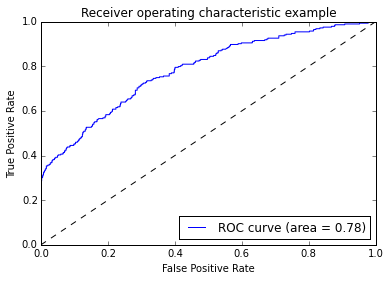

In [29]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Table['Actual'],Table['Predicted'])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## Test Dataset

In [30]:
#Create new features
test['giver_username_if_known_011'] = test.giver_username_if_known.map(lambda x: 0 if x == "N/A" else 1)
test['request_text_edit_aware_len'] = test.request_text_edit_aware.map(lambda x: len(x))
test['request_title_len'] = test.request_title.map(lambda x: len(x))

In [31]:
test['unix_timestamp_of_request_utc_year'] = test.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).year)
test['unix_timestamp_of_request_utc_month'] = test.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).month)
test['unix_timestamp_of_request_utc_day'] = test.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).day)
test['unix_timestamp_of_request_utc_hour'] = test.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).hour)
test['unix_timestamp_of_request_utc_wkday'] = test.unix_timestamp_of_request.map(lambda x: datetime.datetime.fromtimestamp(x).weekday())

In [32]:
test['request_text_edit_aware_img'] = test.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_img, x)) <> 0 else 0 )
test['request_text_edit_aware_reciprocity'] = test.request_text_edit_aware.map(lambda x: 1 if len(re.findall(re_pattern_reciprocity, x)) <> 0 else 0 )
test['subreddit_groups'] = test.requester_subreddits_at_request.map(lambda x: 1 if len(re.findall(re_pattern_subreddit, str(x))) <> 0 else 0 )

In [33]:
X_test = test[train_cols].values
Output_test  = Extratrees.predict(X_test)

In [34]:
ids  = pd.DataFrame(test['request_id'])
predicted = pd.DataFrame(Output_test)

In [35]:
Table2 = ids.join(predicted)
Table2.columns = ['request_id','requester_received_pizza']

In [36]:
Table2.head()

,request_id,requester_received_pizza
0,t3_i8iy4,0.408284
1,t3_1mfqi0,0.163613
2,t3_lclka,0.084285
3,t3_1jdgdj,0.021223
4,t3_t2qt4,0.098958


In [37]:
np.mean(Table2['requester_received_pizza'])

0.24546345477429626

In [38]:
np.std(Table2['requester_received_pizza'])

0.23537268516365273

In [39]:
print 'True' , len(Table2.loc[Table2['requester_received_pizza'] >= 0.5])
print 'False' , len(Table2.loc[Table2['requester_received_pizza'] < 0.5])

True 155
False 1476


In [40]:
#Export file
Table2.to_csv('GradientBoostingRegressor10.csv',index=False)

In [1]:
p1=60600/207369.0
n1=207369
p2=81567/221030.0
n2=221030

In [2]:
p = (p1 * n1 + p2 * n2) / (n1 + n2)

In [3]:
p

0.3318565169386483

In [4]:
import numpy as np

In [5]:
p*(1-p)

0.22172776910399697

In [6]:
(1/float(n1)) + (1/float(n2))

9.346594285206152e-06

In [7]:
SE = np.sqrt((p*(1-p)) * ((1/float(n1)) + (1/float(n2))))

In [8]:
SE

0.0014395830992266225

In [9]:
z = (p1 - p2) / SE 

In [10]:
z

-53.347852299195289

In [ ]:
0.0014401275195201396